In [4]:
import sys
import pandas as pd
import os
import numpy as np
pd.options.display.max_columns = 50

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

ASIM_OUTPUT = r"E:\Met_Council\metc-asim-model\Base_2018\activitysim\output"
ASIM_CONFIGS_PATH = r'E:\Met_Council\metc-asim-model\source\activitysim\configs'
SURVEY_SUMMARY_PATH = r'E:\Met_Council\metc-asim-model\Input\Visualizer\base'
SYNPOP_INPUT = r'E:\Met_Council\metc-asim-model\Input\socioeconomic'
SURVEY_PATH = r'E:\Met_Council\survey_data\Phase1\SPA_Inputs'
CENSUS_SUMMARY_PATH = r'E:\Met_Council\metc-asim-model\Input\Visualizer\census'

PERTYPEMAP = {1: 'FT', 2: 'PT', 3: 'U', 4: 'NW', 5: 'R', 6: 'SD', 7: 'SPD', 8: 'PS'}

TourCompMap = {'All Adult': 'adults', 'All Children': 'children', 'Mixed': 'mixed'}

coef_map = {'adults': 'coef_asc_adults', 'children': 'coef_asc_children', 'mixed': 'coef_asc_mixed'}

hh = pd.read_csv(os.path.join(ASIM_OUTPUT, "final_households.csv")).set_index('household_id')
tours = pd.read_csv(os.path.join(ASIM_OUTPUT, "final_tours.csv")).set_index('tour_id')
tours['hhsize'] = np.array(hh['hhsize'].reindex(tours['household_id'])).clip(0,5)
obs_joint_hh_size = pd.read_csv(os.path.join(SURVEY_SUMMARY_PATH, "jointToursHHSize.csv")) #.rename(columns = {'freq': 'ObsN'})
obs_joint_comp_party_size = pd.read_csv(os.path.join(SURVEY_SUMMARY_PATH, "jointCompPartySize.csv")) #.rename(columns = {'freq': 'ObsN'})


# obs_joint_comp_party_size['COMPOSITION'] = obs_joint_comp_party_size['COMPOSITION'].map(TourCompMap)
# obs_joint_comp_party_size['ObsPct'] = obs_joint_comp_party_size['ObsN'] / obs_joint_comp_party_size['ObsN'].sum()
# asim_config = pd.read_csv(os.path.join(ASIM_CONFIGS_PATH, "joint_tour_composition_coefficients.csv"))

C:\Users\andrew.rohne\AppData\Local\Temp\2\ipykernel_13460\524619872.py:25: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  tours = pd.read_csv(os.path.join(ASIM_OUTPUT, "final_tours.csv")).set_index('tour_id')


# Joint Tours by HH Size

In [5]:
obs_joint_hh_size

,jointTours,hhsize,freq
0,0,2,74.829548
1,1,2,17.760517
2,2,2,7.409935
3,0,3,65.826808
4,1,3,21.689344
5,2,3,12.483848
6,0,4,53.065144
7,1,4,27.793263
8,2,4,19.141593
9,0,5,64.331033


In [6]:
tours

,person_id,tour_type,tour_type_count,tour_type_num,tour_num,tour_count,tour_category,number_of_participants,destination,origin,household_id,tdd,start,end,duration,composition,destination_logsum,hhsize
tour_id,,,,,,,,,,,,,,,,,,
6517,158,work,1,1,1,1,mandatory,1,1794.0,2487,60,292.0,7.0,26.0,19.0,NaN,NaN,3
6591,160,school,1,1,1,1,mandatory,1,3011.0,2487,60,373.0,9.0,26.0,17.0,NaN,NaN,3
7132,173,work,1,1,1,1,mandatory,1,1743.0,2487,66,414.0,10.0,28.0,18.0,NaN,NaN,3
7165,174,school,1,1,1,1,mandatory,1,2268.0,2487,66,451.0,11.0,27.0,16.0,NaN,NaN,3
22876,557,work,1,1,1,1,mandatory,1,2495.0,2487,211,449.0,11.0,25.0,14.0,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158083751,3855701,escort,2,2,2,2,non_mandatory,1,2964.0,2972,1544091,NaN,NaN,NaN,NaN,NaN,10.690281,5
158083889,3855704,othdiscr,1,1,1,1,non_mandatory,1,2972.0,2972,1544091,NaN,NaN,NaN,NaN,NaN,11.631529,5
158086234,3855761,shopping,1,1,1,1,non_mandatory,1,2967.0,2972,1544109,NaN,NaN,NaN,NaN,NaN,8.665850,2


In [7]:
# [tours['tour_category'] == 'joint']
tours['jointTours'] = tours['tour_count']
tours.loc[tours['tour_category'] != 'joint', 'jointTours'] = 0
model_tours = pd.concat([
    (tours[tours['hhsize'] > 1].groupby(['jointTours', 'hhsize']).agg(model = ('household_id', 'count'))/(tours[tours['hhsize'] > 1].groupby('hhsize').agg(model = ('household_id', 'count'))/100.0)).reset_index().assign(hhsize = lambda x: x['hhsize'].astype(str)),
    (tours[tours['hhsize'] > 1].groupby(['jointTours']).agg(model = ('household_id', 'count'))/(tours[tours['hhsize'] > 1].shape[0]/100.0)).assign(hhsize = 'Total').reset_index()
])
jtf_part_compare = model_tours.merge(obs_joint_hh_size.rename(columns = {'freq': 'survey'}), how = 'left', on = ['jointTours', 'hhsize'])
jtf_part_compare

,jointTours,hhsize,model,survey
0,0,2,86.650766,74.829548
1,0,3,89.235065,65.826808
2,0,4,89.279045,53.065144
3,0,5,90.217053,64.331033
4,1,2,6.910818,17.760517
5,1,3,5.331538,21.689344
6,1,4,4.747375,27.793263
7,1,5,3.520305,18.671166
8,2,2,6.438416,7.409935
9,2,3,5.433397,12.483848


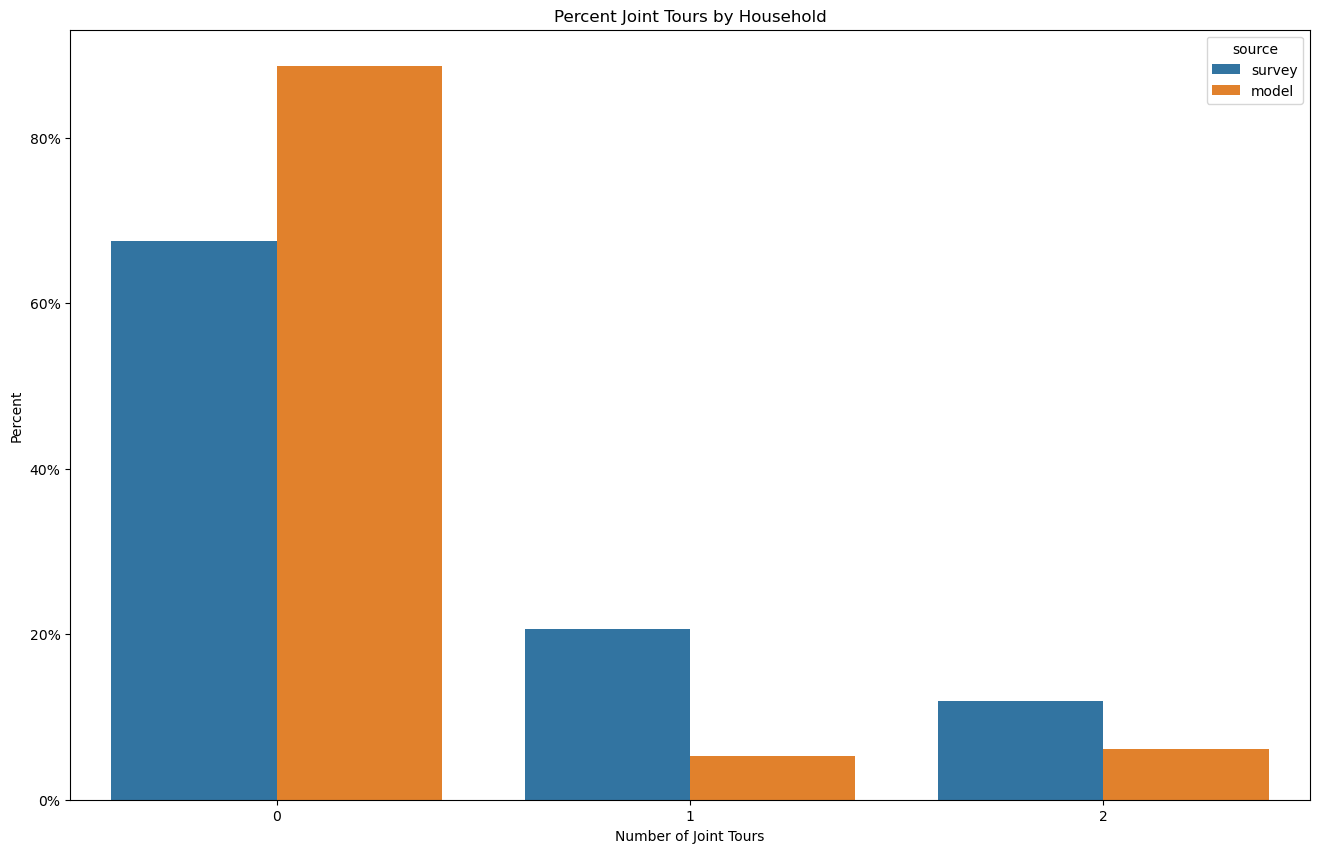

In [9]:
plot_data = pd.concat([jtf_part_compare[jtf_part_compare['hhsize'] == 'Total'][['jointTours', 'survey']].rename(columns = {'survey': 'percent'}).assign(source = 'survey'),
    jtf_part_compare[jtf_part_compare['hhsize'] == 'Total'][['jointTours', 'model']].rename(columns = {'model': 'percent'}).assign(source = 'model')
    ])

plot_data['percent'] = plot_data['percent'] / 100.0

fig = plt.figure(figsize=(16,10))
ax = fig.add_subplot()
sns.barplot(data = plot_data, x = 'jointTours', y = 'percent', hue = 'source')
plt.title(f"Percent Joint Tours by Household")
# plt.xticks(fontsize=16, rotation = 90)
# plt.yticks(fontsize=16)
plt.ylabel('Percent')
plt.xlabel('Number of Joint Tours')
ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0%}'))

plt.show()

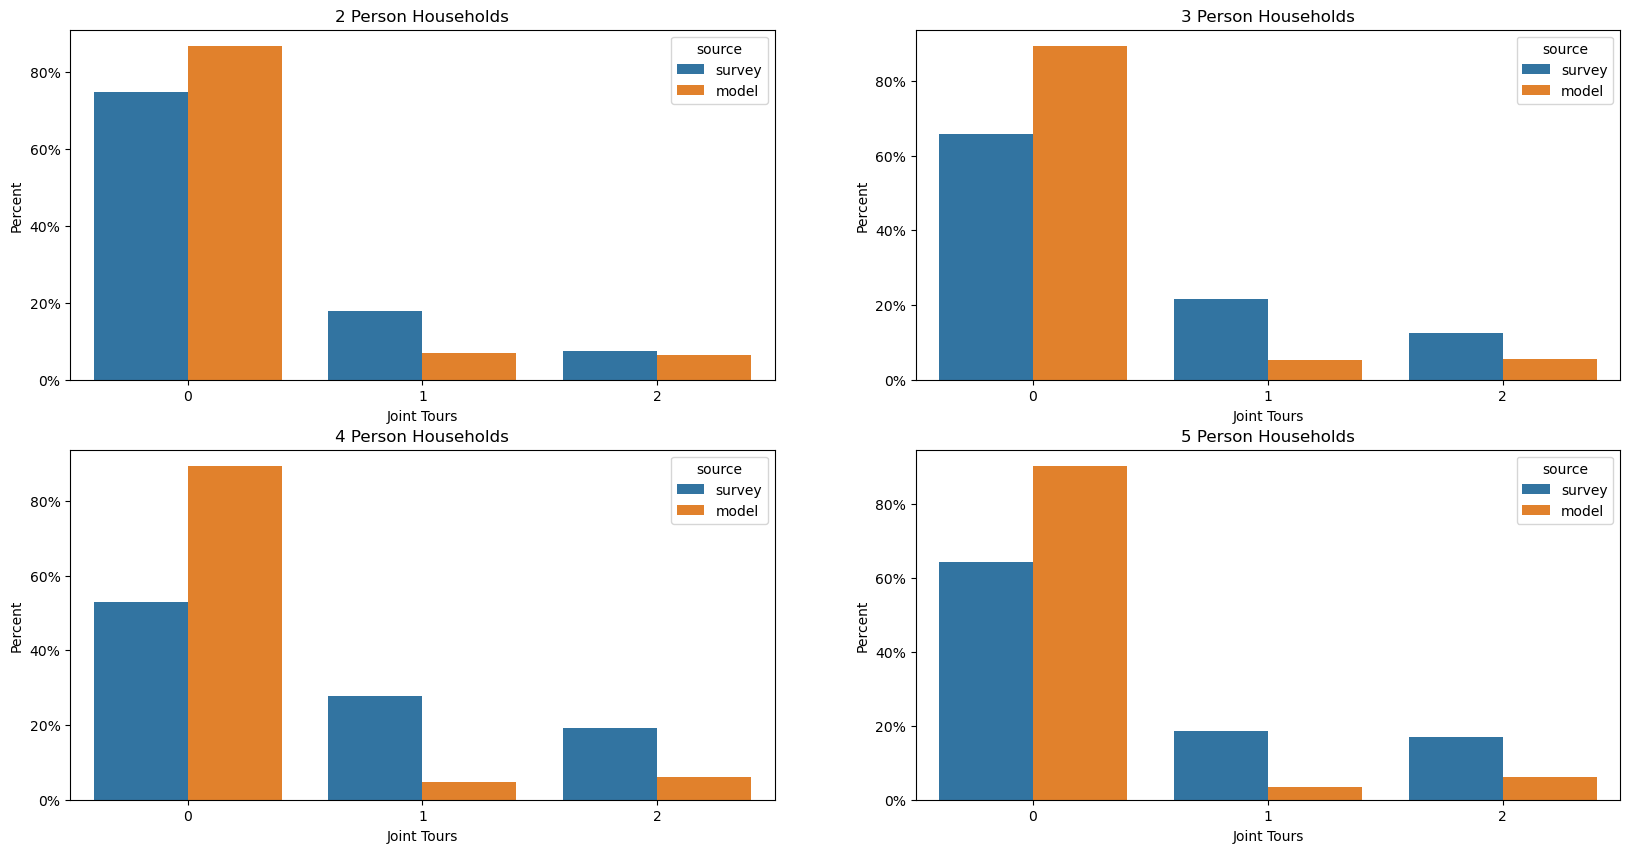

In [10]:
plot_data = pd.concat([jtf_part_compare[jtf_part_compare['hhsize'] != 'Total'][['jointTours', 'hhsize', 'survey']].rename(columns = {'survey': 'percent'}).assign(source = 'survey'),
    jtf_part_compare[jtf_part_compare['hhsize'] != 'Total'][['jointTours', 'hhsize', 'model']].rename(columns = {'model': 'percent'}).assign(source = 'model')
    ])

plot_data['percent'] = plot_data['percent'] / 100.0

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
plot_idx = 220
count = 1
for hh_size in np.arange(2, 6):
    ax = plt.subplot(plot_idx + count)
    sns.barplot(data = plot_data[plot_data['hhsize'] == str(hh_size)], x = 'jointTours', y = 'percent', hue = 'source')
    plt.title(f"{hh_size} Person Households")
    # plt.xticks(fontsize=16, rotation = 90)
    # plt.yticks(fontsize=16)
    plt.ylabel('Percent')
    plt.xlabel('Joint Tours')
    ax.yaxis.set_major_formatter(matplotlib.ticker.StrMethodFormatter('{x:,.0%}'))
    count += 1

# Coefficient Adjustment

In [11]:
#NOTE: This model is extremely difficult to calibrate. 
jtf_part_compare['adjust'] = np.log(jtf_part_compare['survey'] / jtf_part_compare['model'])
jtf_part_compare

,jointTours,hhsize,model,survey,adjust
0,0,2,86.650766,74.829548,-0.146673
1,0,3,89.235065,65.826808,-0.304247
2,0,4,89.279045,53.065144,-0.520247
3,0,5,90.217053,64.331033,-0.338176
4,1,2,6.910818,17.760517,0.943890
5,1,3,5.331538,21.689344,1.403181
6,1,4,4.747375,27.793263,1.767202
7,1,5,3.520305,18.671166,1.668433
8,2,2,6.438416,7.409935,0.140539
9,2,3,5.433397,12.483848,0.831871
